# PH413 Computation Physics - Practice [Week 6]

**==================== ★★ Assignment1 ★★ ====================**

* Verify whether a set of numbers satisfy Benford's law from the Wikipedia page on physical constants
    http://en.wikipedia.org/wiki/Physical_constant
        
* Benford's law: For the leading digit $d \in \{1, 2, \dots, 9\}$, $d$ occurs with probability $p(d) = \log_{10} \left( 1 + 1/d \right)$

* You don't have to compare the two distributions exactly.
    
**============================================================**   

There is [a list of Physical constants](https://en.wikipedia.org/wiki/List_of_physical_constants) which I will use because the main article about constants has ~10 constants listed with their value

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from urllib.request import urlopen
import numpy as np

# web crawling
link = 'https://en.wikipedia.org/wiki/List_of_physical_constants'
html = urlopen(link).read()
soup = BeautifulSoup(html, "html.parser")

In [22]:
# analizing the soup
# first locating for the table, than the correct rows and than iterating through each row
table = soup.find("table")
table_data = table.find("tbody")
table_rows = table_data.findAll("tr")
table_rows = table_rows[1:-1]

data_fields = []
for table_row in table_rows:
    data_fields.append(table_row.findAll('td')[2])

first_digits = []
for data_field in data_fields:
    if data_field.get_text()[0] == '−': # negative
        first_digits.append(data_field.get_text()[1])
    elif data_field.get_text()[0] == '0': # number < 1 
        first_digits.append(data_field.get_text()[2])
    else: # other
        first_digits.append(data_field.get_text()[0])
    

first_digits = np.array(first_digits)
values_str, counts = np.unique(first_digits, return_counts=True)

values = []
for value_str in values_str:
    values.append(int(value_str))
    
counts = counts / np.sum(counts)

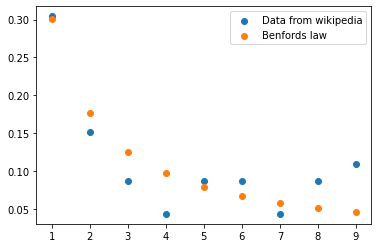

In [21]:
# plotting
d = np.arange(1,10,1)
plt.scatter(values, counts, label='Data from wikipedia')
plt.scatter(d, np.log10(1 + 1/d), label='Benfords law')

plt.legend()
# we can look at the plot and can see that it kind of behaves like the law suggests

## END OF WEEK 6! Have a good day :)